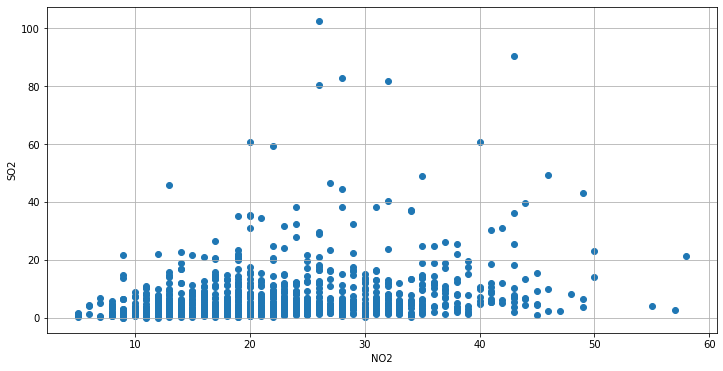

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
cinci_pollution = pollution[pollution['city'] == 'Cincinnati']

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(cinci_pollution['NO2'], cinci_pollution['SO2'])
ax.grid()
ax.set_xlabel('NO2')
ax.set_ylabel('SO2')
plt.show()

That's a lot of data.  How do we highlight some?

# ***Highlighting the data***

คำถาม รู้ได้ไงว่าจะเลือก day, month, year ที่มาเน้นยังไง?

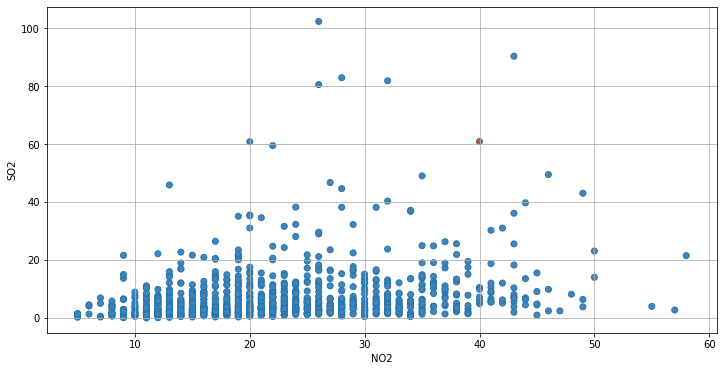

In [ ]:
# Make an array of colors based upon if a row is a given day
cinci_colors = ['orangered' if day == 38 else 'steelblue' for day in cinci_pollution['day']]

# Plot with additional scatter plot argument facecolors
fig, ax = plt.subplots(figsize=(12, 6))
p = sns.regplot(x='NO2', y='SO2', data = cinci_pollution, fit_reg=False, scatter_kws={'facecolors': cinci_colors,'alpha': 0.99}, ax=ax)
ax.grid()
plt.show()

### ***Hardcoding a highlight***

You are working with the city of Houston to look at the relationship between sulfur dioxide ($SO_2$) and nitrogen dioxide ($NO_2$) pollution, specifically, pollution in the most recent year data was collected (2014). You have singled out a particularly bad day, November 26th, where there was a bad spike in the $SO_2$ levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

Download the [Seaborn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4).

* Modify the list comprehension to color the value corresponding to the 330th `day` (November 26th) of the year 2014 to `orangered` and the rest of the points to `lightgray`.
* Pass the `houston_colors` array to `regplot()` using the `scatter_kws` argument to color the points.

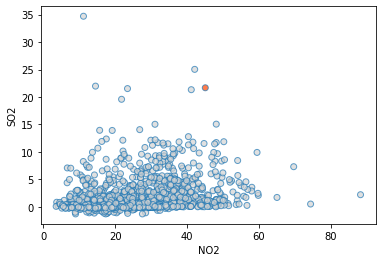

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

houston_pollution = pollution[pollution['city']  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2', y = 'SO2', data = houston_pollution, fit_reg = False, 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

Nov 26th happened to be on the high end for both $SO_2$ and $NO_2$.

### ***Programmatically creating a highlight***

You are continuing your work for the city of Houston. Now you want to look at the behavior of both NO2 and SO2 when the un-plotted ozone (O3) value was at its highest.

To do this, replace the logic in the current list comprehension with one that compares a row's O3 value with the highest observed O3 in the dataset. Note: use `sns.scatterplot()` instead of `sns.regplot()`. This is because `sns.scatterplot()` can take a non-color vector as its hue argument and colors the points automatically while providing a helpful legend.

* Find the value corresponding to the highest observed O3 value in the `houston_pollution` DataFrame. Make sure to type the letter O and not the number zero!
* Append the column `'point_type'` to the `houston_pollution` DataFrame to mark if the row contains the highest observed O3.
* Pass this newly created column to the `hue` argument of `sns.scatterplot()` to color the points.

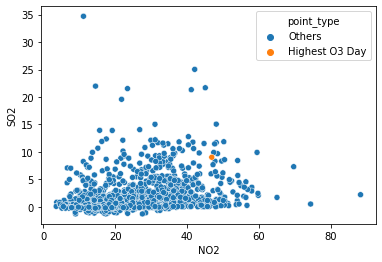

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

houston_pollution = pollution[pollution['city']  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution['O3'].max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3 == max_O3 else 'Others' for O3 in houston_pollution['O3']]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',  y = 'SO2', hue = 'point_type', data = houston_pollution)
plt.show()

Highlights are great for making plots to show others, but they can also help you explore a dataset. Sometimes you will want to highlight a point in a plot based upon its value for some variable not displayed. In this plot, we used automatic filtering to see that the highest $O_3$ day fell in the upper (but not highest) values of $NO_2$ and $SO_2$. This indicates a potentially weak interaction between $O_3$ and the other variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


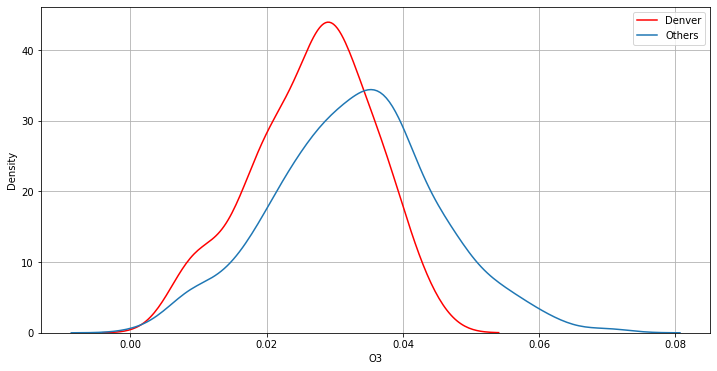

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(12,6))

pollution_nov = pollution[pollution['month'] == 10]

sns.distplot(pollution_nov[pollution_nov['city'] == 'Denver']['O3'], hist=False, color='red', ax=ax, label='Denver')

sns.distplot(pollution_nov[pollution_nov['city'] != 'Denver']['O3'], hist=False, ax=ax, label='Others')

ax.grid()
ax.legend()
plt.show()

# ***KDE Plots are difficult to keep track of lines***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

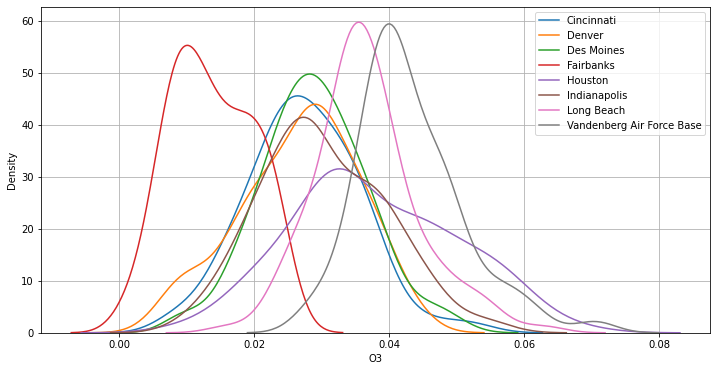

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(12,6))

pollution_nov = pollution[pollution['month'] == 10]

for city in pollution_nov['city'].unique():
    sns.distplot(pollution_nov[pollution_nov['city'] == city]['O3'], hist=False, ax=ax, label=city)
ax.grid()
ax.legend()
plt.show()

# ***Swarmplot***

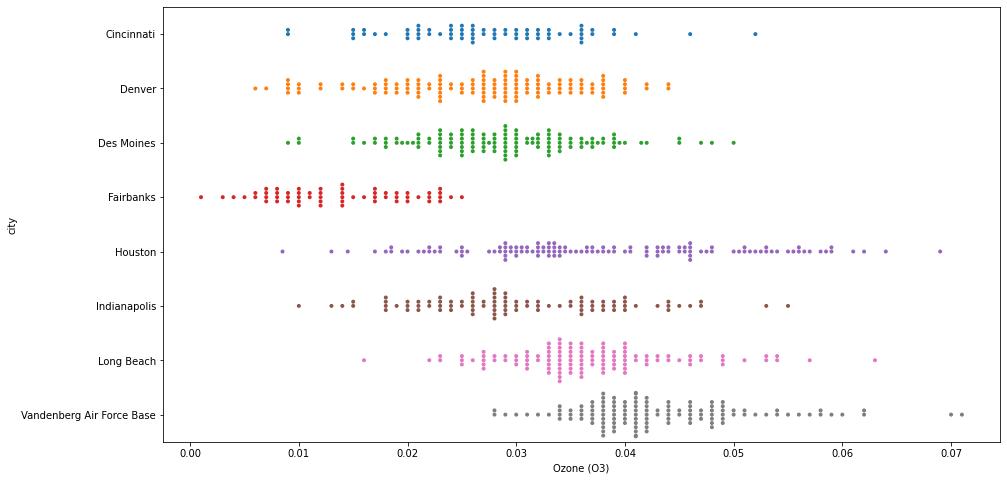

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(15,8))

pollution_nov = pollution[pollution['month'] == 10]

sns.swarmplot(y="city", x="O3", data=pollution_nov, size=4, ax=ax)
ax.set_xlabel("Ozone (O3)")
plt.show()

### ***Comparing with two KDEs***

Imagine that you work for the premier air-filter provider. Your company has asked you to build a report that looks into why 2012 was a particularly good year for sales of your ozone (O3) filter. You downloaded some helpful pollution data from the USGS, and you want to make a concise visualization that compares the general pattern of O3 pollution for 2012 to all other years on record.

To do this, you can build two overlaid kernel density estimation plots (KDEs): one for 2012 O3 data and one for all other years.

* Filter the data in the first `sns.kdeplot()` call to include only the year `2012`.
* Shade under the first KDE with the `shade` argument.
* Add the label `'2012'` for the plot legend.
* Repeat the first three steps for second `sns.kdeplot()` call, but filter the data to not include `2012`. Use the label `'other years'`.

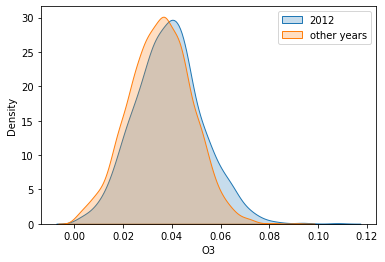

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution['year'] == 2012]['O3'], shade=True, label='2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution['year'] != 2012]['O3'], shade=True, label='other years')
plt.legend()
plt.show()

 2012 had slightly higher than typical O3 levels, which may explain the filter sales. However, keen observers will note that some of our cities don't have full data for 2012, which could skew the trends. Next up we will look at techniques that can help out KDE's be more honest about this lack of data.

 ### ***Improving your KDEs***

One way of enhancing KDEs is with the addition of a `rug` plot. Rug plots are little dashes drawn beneath the density that show precisely where each data point falls. Adding a rug plot is particularly useful when you don't have a ton of data.

With small amounts of data you often have gaps along your support with no data, and it can be hard to tell whether a non-zero KDE line means data was present or is due to a wide kernel. A rug plot helps address this.

Let's return to the `sns.distplot()` function to draw two KDEs: one looking at the data for `Vandenberg Air Force Base` and the other looking at all the other cities in the pollution data. Since there is much less data contributing to the shape of the Vandenberg plot, add a `rug` plot beneath it.

* Turn off the histogram overlay for the first plot.
* Make the Vandenberg plot `'steelblue'`.
* Turn on `rug` plot functionality in the Vandenberg plot.
* Remove histogram from the non-Vandenberg plot and set its color to `'gray'`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


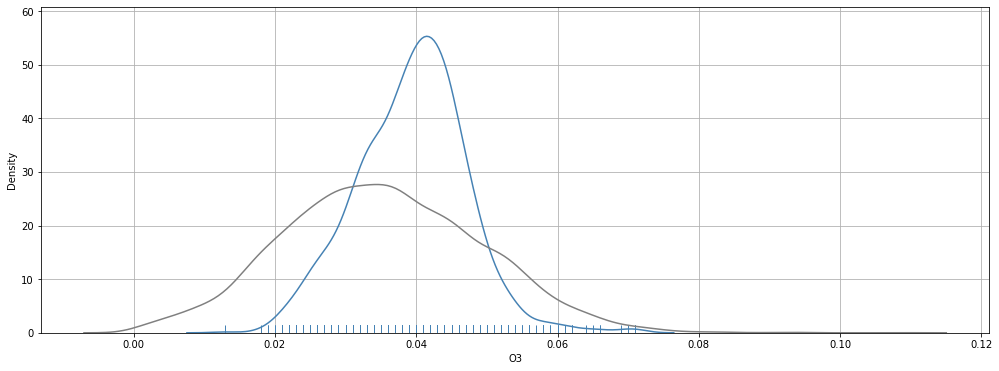

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(17, 6))

sns.distplot(pollution[pollution['city'] == 'Vandenberg Air Force Base']['O3'], 
             label='Vandenberg', hist=False, color='steelblue', rug=True, ax=ax)

sns.distplot(pollution[pollution['city'] != 'Vandenberg Air Force Base']['O3'], 
             label='Other cities', hist=False, color='gray', ax=ax)
ax.grid()
plt.show()

Rug plots can improve KDEs as they help you see those gaps that you may have otherwise assumed were filled with data. In this plot, the rug plot shows that there is a small, but not neglible gap, in the data around O3 = 0.065.

### ***Swarmplot***

Build a swarmplot using `sns.swarmplot()` that looks at the Ozone levels for all the cities in the pollution data for the month of March. To make the beeswarm a bit more legible, decrease the point size to avoid the overcrowding caused by the many points drawn on the screen. Last, since you've done some manipulation of the data to make this plot, provide a title to help the reader orient with what they are viewing.

* Subset the `pollution` data to include just the observations in `March`.
* Plot the `O3` levels as the continuous value in the `swarmplot()`.
* Decrease the point size to 3 to avoid crowding of the points.
* Title the plot `'March Ozone levels by city'`.

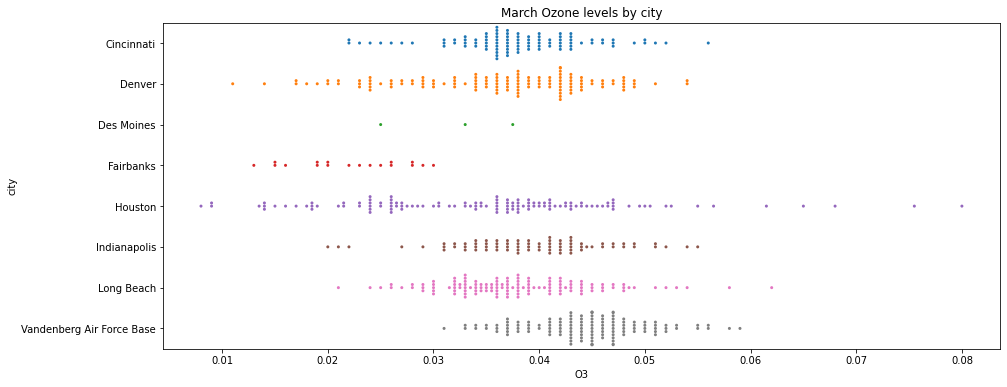

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(15, 6))

# Filter data to just March
pollution_mar = pollution[pollution['month'] == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y="city", x='O3', data=pollution_mar, size=3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

Vandenberg on average has high O3 levels in March. However, Houston has a much wider range and can sometimes reach much higher levels.  Des Moines and Fairbanks have far fewer observations than the other sites.


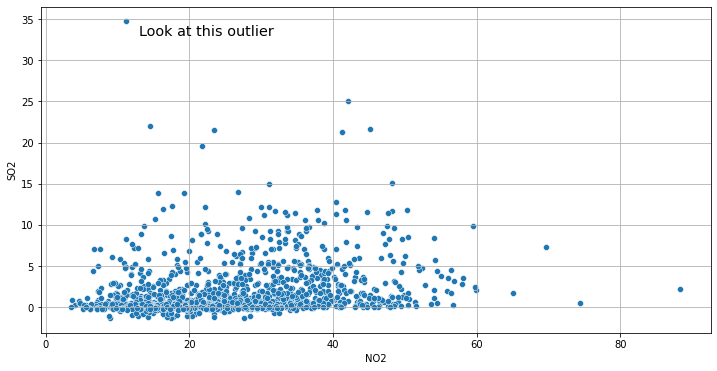

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(12, 6))
houston_pollution = pollution[pollution['city'] == 'Houston']

sns.scatterplot(x='NO2', y='SO2', data=houston_pollution, ax=ax)

# X and Y location of outlier and text
plt.text(13,33,'Look at this outlier', fontdict = {'ha': 'left', 'size': 'x-large'})
ax.grid()
plt.show()

# ***Annotations with Arrows***

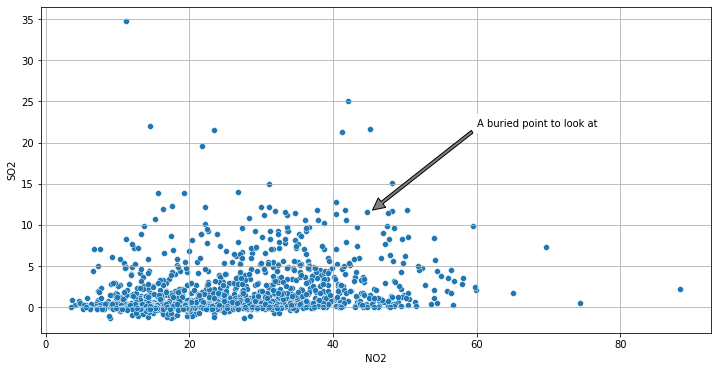

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
houston_pollution = pollution[pollution['city'] == 'Houston']
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(x='NO2', y='SO2', data = houston_pollution, ax=ax)

# Arrow start and annotation location
plt.annotate('A buried point to look at', xy=(45.5,11.8), xytext=(60,22),
# Arrow configuration and background box
arrowprops={'facecolor':'grey', 'width': 3}, backgroundcolor = 'white' )
ax.grid()
plt.show()

### ***A basic text annotation***

On the current `scatter` plot, you can see a particularly prominent point that contains the largest SO2 value observed for August. This point is `Cincinnati` on August 11th, 2013; however, you would not be able to learn this information from the plot in its current form. Basic text annotations are great for pointing out interesting outliers and giving a bit more information. Draw the readers attention to this `Cincinnati` value by adding a basic text annotation that gives a bit of the background about this outlier.

* Filter the data plotted in `scatter` plot to just August.
* Draw text annotation at `x=0.57` and `y=41` to call out the highest SO2 value.
* Label annotation with `'Cincinnati had highest observed\nSO2 value on Aug 11, 2013'` (note the line break).
* Change the font-size to `'large'` for the annotation.

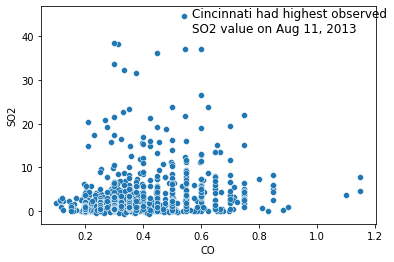

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

# Draw basic scatter plot of pollution data for August
sns.scatterplot(x='CO', y='SO2', data=pollution[pollution['month']==8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41, 
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

The large-scale relationship of the two pollutants also gives the viewer a glimpse into an outlier.

### ***Arrow annotations***

* Grab the row from `jan_pollution` that corresponds to New Year's Day 2012 in the city of Long Beach using the pandas' `.query()` method.
* Set the endpoint of the arrow (`xy`) by using the `CO` and `NO2` column values from the `lb_newyears` DataFrame.
* Use the argument `xytext` to place the annotation arrow's text in the bottom left corner of the display at x = `2`, y = `15`.
* `'shrink'` the arrow to `0.03`, so it doesn't occlude the point of interest.

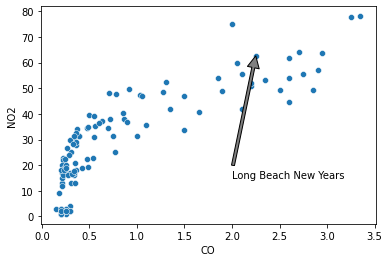

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2', data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years', xy = (lb_newyears['CO'], lb_newyears['NO2']),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.001},
             backgroundcolor = 'white')
plt.show()

### ***Combining annotations and color***

You believe that Long Beach, California has a smog problem. Using the `pollution` data, you'll attempt to make a point for increasing smog reduction regulations using your data visualization. Specifically, you want to focus on the relationship of CO to O3 levels during 2014 at a city council meeting.

To emphasize how Long Beach compares to a set of peer cities, you've decided to highlight Long Beach and draw attention to a particularly bad day where the CO level was 1.6 and O3 was 0.072 using an annotation.

* Using a list comprehension, make a vector of colors for each point with `'orangered'` if the point belongs to Long Beach, and `'lightgray'` if it doesn't.
* Use the `is_lb` vector to provide custom colors for each point using the additional keyword argument facecolors in the `scatter_kws` argument.
* In the same `scatter_kws` dictionary, set the opacity to `0.3`.
* Add an annotation at `x=1.6` and `y=0.072` using the text `'April 30th, Bad Day'` to draw attention to a specific point in the data.

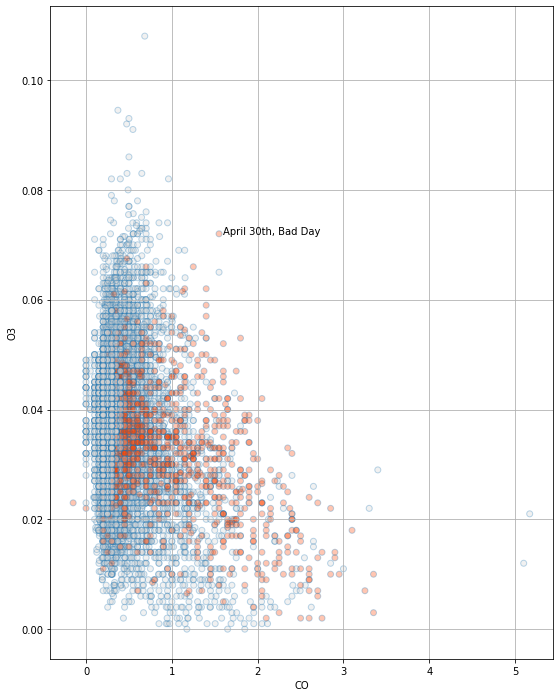

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

fig, ax = plt.subplots(figsize=(9,12))
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city == 'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x='CO', y='O3', data=pollution, fit_reg=False, 
            scatter_kws={'facecolors':is_lb, 'alpha': 0.3}, ax=ax)

# Add annotation to plot
ax.grid()
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

***List comprehensions*** are a great tool for quickly controlling colors or other aspects for a plot. It's often easier and cleaner to directly pass a vector of the desired aesthetics to your plot rather than adding a new column to your DataFrame

### ***Getting rid of unnecessary color***

You might want to compare the relationship `CO` to `NO2` values across cities using a simple `scatter` plot with color to differentiate the different cities' data.


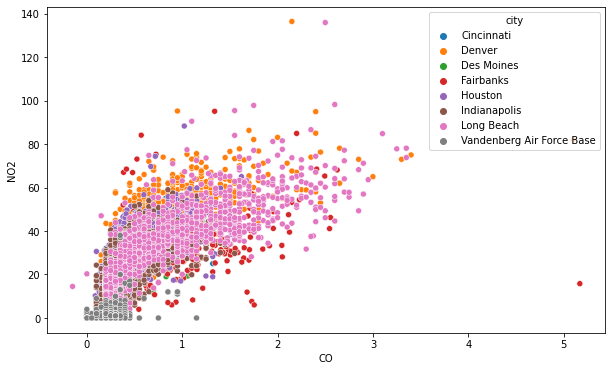

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=pollution, x='CO', y='NO2', hue='city')
plt.show()

Unfortunately, the resulting plot is very convoluted. It's hard to make out differences between the cities because one has to differentiate between similar colors. It turns out that sometimes the best color palette for your plot is no color at all.

To remedy this hard-to-read chart, get rid of the color component and facet by each city. While the resulting plot may not be as pretty, it will be a much better tool to decipher the differences.

* To set up a chart faceted by the city, pass the plotting function the `pollution` data, map the `city` to the columns, and make the facet three columns wide.
* Use the `g.map()` function to map a `scatterplot()` over our grid with the same aesthetic as the original scatter but without the `hue` argument.

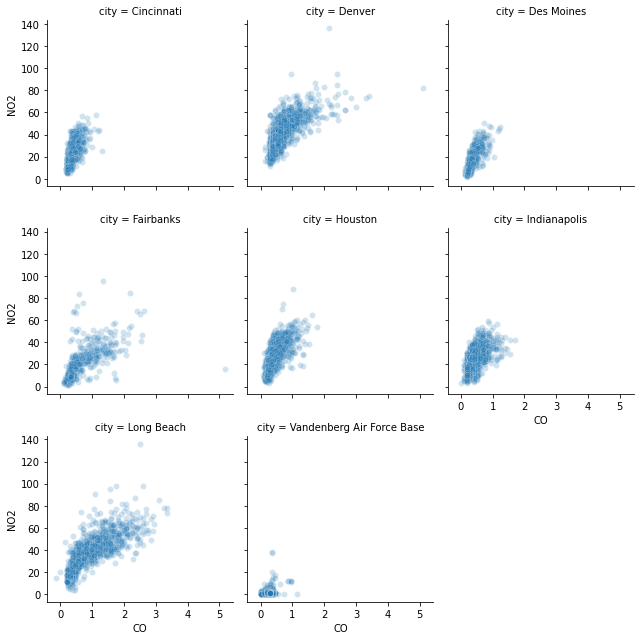

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data=pollution,
                  col='city',
                  col_wrap=3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha=0.2)
plt.show()

### ***Fixing Seaborn's bar charts***

Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception. By drawing each bar as a different color, there is a risk of the viewer seeing two identical sized bars as different sizes as people tend to see some colors as 'larger' than others.

We discussed two easy ways to fix this. First, to put a border around the bars; second, change all bar colors to the same value. Try both of these solutions on our pollution data.

* Modify the default `barplot` by adding a black border around each bar.
* Now, make your plot more perceptually precise by coloring all bars `'cadetblue'`.

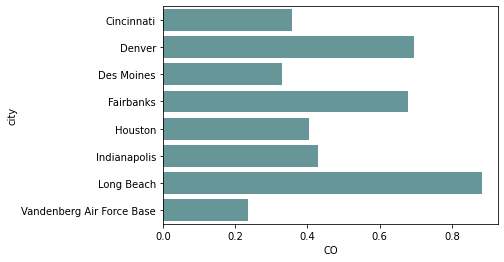

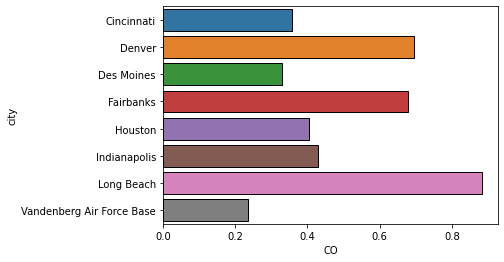

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

sns.barplot(y='city', x='CO', estimator=np.mean, ci = False, data = pollution, 
            color='cadetblue')
plt.show()

sns.barplot(y='city', x='CO', estimator=np.mean, ci=False, data=pollution, 
            edgecolor='black')
plt.show()

# ***Continuous Color Palettes***

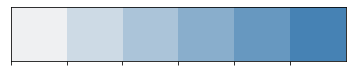

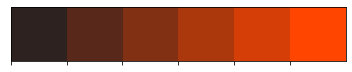

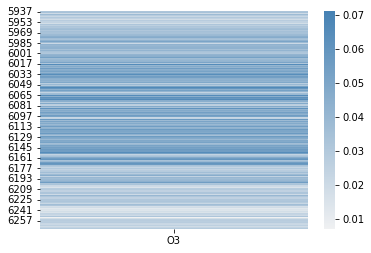

In [ ]:
blue_scale = sns.light_palette("steelblue")
sns.palplot(blue_scale)
plt.show()
red_scale = sns.dark_palette("orangered")
sns.palplot(red_scale)
plt.show()

indy_oct = pollution.query("year == 2015 & city == 'Indianapolis'")
blue_scale = sns.light_palette("steelblue", as_cmap = True)
sns.heatmap(indy_oct[['O3']], cmap = blue_scale)
plt.show()

# ***Making a custom continuous palette***

You are interested in the pollution levels of Cincinnati for the year 2014. Specifically, you're interested in `CO` and `NO2`, so you make a simple `scatterplot` to show the relationship between the two pollutants.

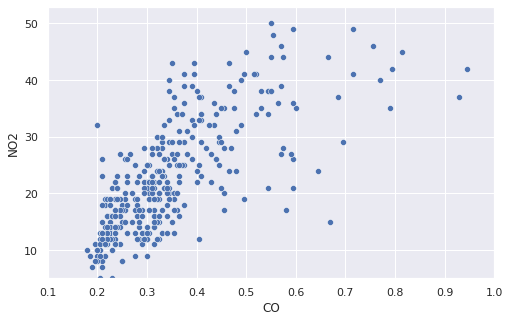

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
df = pollution[(pollution['city']=='Cincinnati') & (pollution['year']==2014)]

sns.set()
fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(x='CO', y='NO2', data=df)
plt.xlim(0.1, 1); plt.ylim(5, 53)
plt.show()

However, there may be some interesting information in how the value of `O3` relates to the two plotted pollutants, so you decide to color the points by their `O3` levels. To do this, you need to define an appropriate continuous palette and map your `O3` column to it in your `scatterplot`.

* Create a palette that continuously maps from white to `'orangered'`.
* Map the column for `O3` values to the color of the points.
* Pass your created palette to the plotting function.

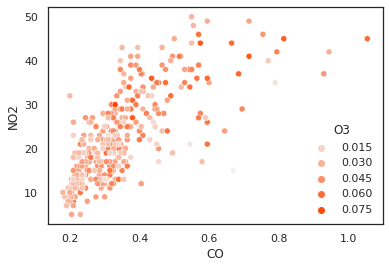

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap=True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x='CO',
                y='NO2',
                hue='O3', 
                data=cinci_2014,
                palette=color_palette)
plt.show()

There doesn't appear to be much of an association of `O3` to either `CO` or `NO2`. By adding color to this simple `scatterplot`, you added a large amount of information on a previously un-visualized variable to the chart while still maintaining high precision in your main goal of comparing the `CO` and `NO2` values to each other.

### ***Customizing a diverging palette heatmap***

The default color scheme used by Seaborn's `heatmap()` doesn't give the value of `0` any special treatment. This is fine for instances when `0` isn't special for the variable you're visualizing but means you will need to customize the palette when `0` is special, such as when it represents a neutral value.

For this visualization, you want to compare all the cities against the average pollution value for `CO` in November 2015. (As is provided in the DataFrame `nov_2015_CO`).

To do this, use a `heatmap` to encode the number of standard deviations away from the average each city's CO pollution was for the day. You'll need to replace the default palette by creating your own custom diverging palette and passing it to the heatmap and informing the function what your neutral value is.


* Pass the diverging palette to your plot.

  * Note that the `sns.heatmap()` function in Seaborn does not have a palette argument but instead requires the `cmap` argument.

* Add your neutral value to the `heatmap` by specifying the `center` argument.

* Set the upper and lower boundaries to the color bar to `-4` and `4` to make the legend symmetric.

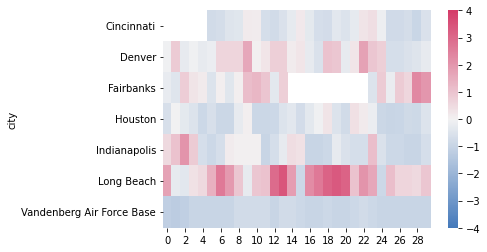

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nov_2015_CO = pd.read_csv('pollution_small.csv')
nov_2015_CO = nov_2015_CO.set_index('city')

# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO, cmap = color_palette, center = 0, vmin=-4, vmax=4)
plt.yticks(rotation = 0)
plt.show()

 Vandenberg Air Force Base always has below average CO values whereas Long Beach, especially towards the end of the month, has much higher than average values. By correctly mapping the zero-point of our values you can immediately pick out patterns in our data in the context of a meaningful data anchor-point.

# ***Categorical Palettes***

บางครั้งต้องแยกสีดีๆ รูปข้างล่างคือ แยกไม่ดี


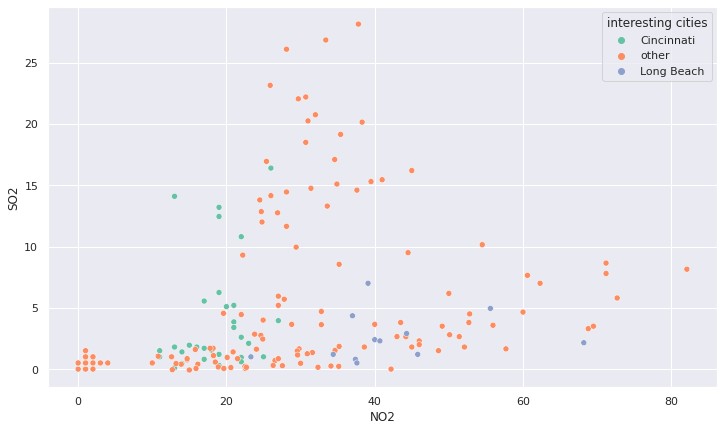

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
sns.set()
fig, ax = plt.subplots(figsize=(12, 7))
pollution['interesting cities'] = [x if x in ['Long Beach', 'Cincinnati'] else 'other' for x in pollution['city'] ]
sns.scatterplot(x="NO2", y="SO2", hue='interesting cities', palette='Set2', data=pollution.query('year == 2014 & month == 12'), ax=ax)
plt.show()

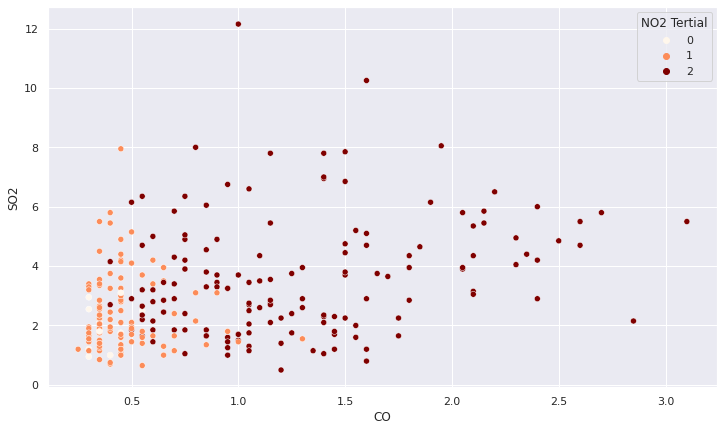

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
sns.set()
fig, ax = plt.subplots(figsize=(12, 7))

# Make a tertials column using qcut()
pollution['NO2 Tertial'] = pd.qcut(pollution['NO2'], 3, labels = False)

# Plot colored by the computer tertials
sns.scatterplot(x="CO", y="SO2", hue='NO2 Tertial', palette="OrRd", 
                data=pollution.query("city == 'Long Beach' & year == 2014"), ax=ax)
plt.show()

### ***Using a custom categorical palette***

When you have a line chart with lots of categories, choosing your palette carefully is essential. Often, default palettes have very similar hues, that are hard to differentiate when spread over the small surface of a line. ColorBrewer palettes are built with this in mind and keep the colors as distinct as possible.

Make a line plot of the `O3` values over the year of 2013 for all the cities where the color of each line is encoded by city. You will use the ColorBrewer palette `'Set2'` to improve upon the default color scheme.

* Query data to January of 2013.
* Encode the color of the lines as the city.
* Change the palette to the `'Set2'` ColorBrewer palette.

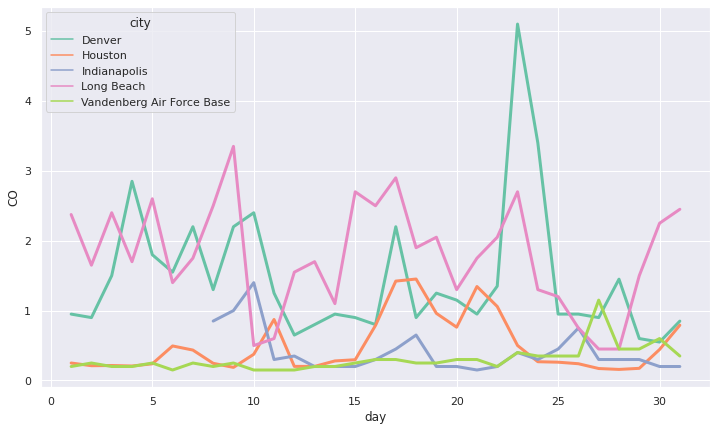

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
fig, ax = plt.subplots(figsize=(12, 7))

# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year == 2013 & month == 1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x="day", y="CO", palette="Set2", hue="city", linewidth = 3, 
             data=pollution_jan13, ax=ax)
plt.show()

### ***Dealing with too many categories***

Sometimes, you may be short on figure space and need to show a lot of data at once. Here you want to show the year-long trajectory of every pollutant for every city in the pollution dataset. Each pollutant trajectory will be plotted as a line with the y-value corresponding to standard deviations from year's average. This means you will have a lot of lines on your plot at once -- way more than you could separate clearly with color.

To deal with this, you have decided to highlight on a small subset of city pollutant combinations (`wanted_combos`). This subset is the most important to you, and the other trajectories will provide valuable context for comparison. To focus attention, you will set all the non-highlighted trajectories lines to of the same `'other'` color.

* Modify the list comprehension to isolate the desired combinations of city and pollutant (`wanted_combos`).
* Tell the line plot to color the lines by the newly created `color_cats` column in your DataFrame.
* Use the units argument to determine how, i.e., from which column, the data points should be connected to form each line.
* Disable the binning of points with the `estimator` argument.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
fig, ax = plt.subplots(figsize=(12, 7))

# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()

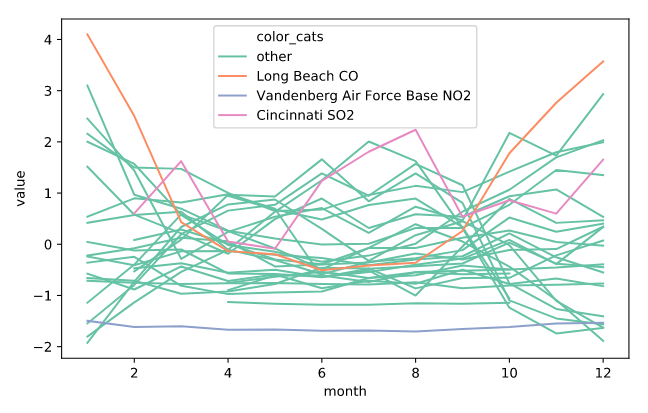

Here by subsetting our colors to be those that you care about you can make a bit more sense of the spaghetti of lines. You see that Long Beach has a bathtub shape for its CO values: going from more than four standard deviations above mean CO values to below average and then back up to more than three standard deviations above by the end of the year. Whereas Vandenberg stays way below average for the entire year.

### ***Coloring ordinal categories***

You are working for the Des Moines city council to assess the associations of various pollutant levels in the city. The two most important pollutants are `SO2` and `NO2` but `CO` is also of interest. You've only been allowed enough space for a single plot for your part of the report.

You start with a scatter plot of the `SO2` and `NO2` values as they are most important and then decide to show the `CO` values using a color scale corresponding to `CO` quartiles. By binning the continuous `CO` values, you have turned `CO` into an ordinal variable that can illuminate broad patterns without requiring much effort from the viewer to compare subtly different shades.

* Set the `qcut()` function to break `'CO'` into quartiles.
* Map the color of your `scatterplot` to the new quartile column.
* Change the `palette` to the ColorBrewer palette `'GnBu'`.

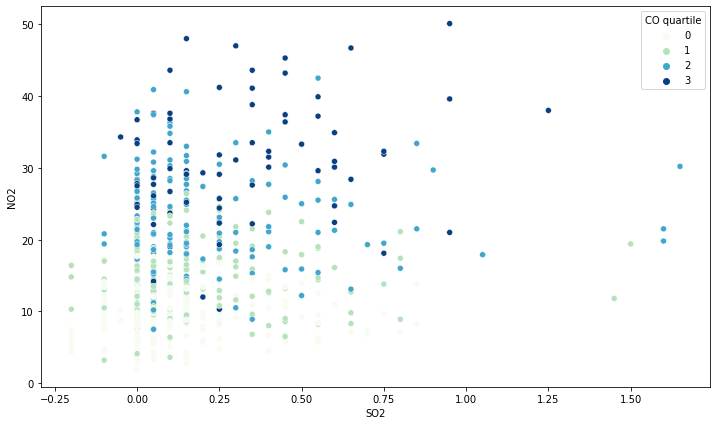

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')
fig, ax = plt.subplots(figsize=(12, 7))

# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q=4, labels=False)

# Filter to just Des Moines
des_moines = pollution.query("city == 'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x='SO2', y='NO2', hue='CO quartile',  data=des_moines, 
                palette='GnBu')
plt.show()

By simplifying the color encoding to just four distinct values, you get a clear picture of the patterns between CO, SO2, and NO2. Here you see the low quartiles of CO seem to relate with NO2 and appear much less related to the SO2 values. By categorizing the continuous color variable, you allow the viewer to investigate patterns along a third variable in a clear and simple way at the expense of some precision: a tradeoff that is often worth it.

### ***Choosing the right variable to encode with color***

You're tasked with visualizing pollution values for Long Beach and nearby cities over time. The supplied code makes the below (hard-to-read plot), which consists of maximum pollution values (provided as `max_pollutant_values`) with the bars colored by the city.

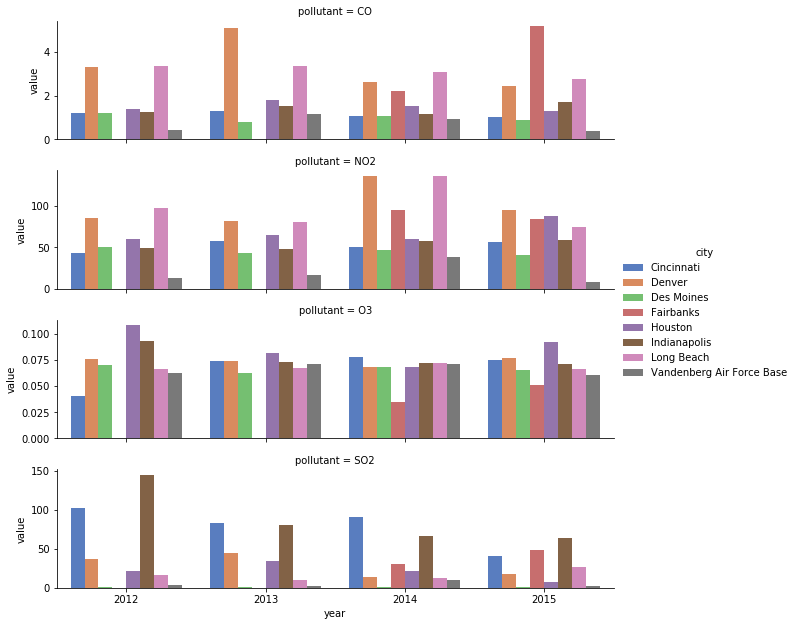

You can quickly improve this with a few tweaks. By modifying the cities shown to only those in the western half of the country you will avoid clutter. Next, swapping the color-encoding from `city` to `year` allows you to use an ordinal palette, saving the reader from continually referring to the legend to check which color corresponds to which city.

* Remove `'Indianapolis'`, `'Des Moines'`, `'Cincinnati'`, `'Houston'` from the cities vector.
* Swap the encodings of the `city` and `year` variables.
* Use the `'BuGn'` ColorBrewer palette to map your colors appropriately for the newly ordinal variable.

In [ ]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values['city'].isin(cities)]

# Swap city and year encodings
sns.catplot(hue='year', x='city',
            y='value', row='pollutant',    
              # Change palette to one appropriate for ordinal categories
            data=city_maxes, palette='BuGn',
            sharey = False, kind='bar')
plt.show()

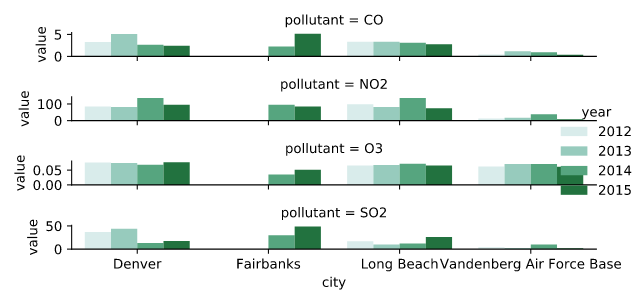

 By simply switching just a few values, the plot is much clearer, and the presentation has more impact. Also, the use of hue as the years go on puts a greater emphasis on the later (more recent) years.

# ***Basic confidence intervals***

You are a data scientist for a fireworks manufacturer in Des Moines, Iowa. You need to make a case to the city that your company's large fireworks show has not caused any harm to the city's air. To do this, you look at the average levels for pollutants in the week after the fourth of July and how they compare to readings taken after your last show. By showing confidence intervals around the averages, you can make a case that the recent readings were well within the normal range.

* Create the lower and upper 95% interval boundaries:

  * Create the lower boundary by *subtracting* `1.96` standard errors (`'std_err'`) from the `'mean'` of estimates.

  * Create the upper boundary by *adding* `1.96` standard errors (`'std_err'`) to the `'mean'` of estimates.

* Pass `pollutant` as the faceting variable to `sns.FacetGrid()` and unlink the x-axes of the plots so intervals are all well-sized.

* Pass the constructed interval boundaries to the mapped `plt.hlines()` function.

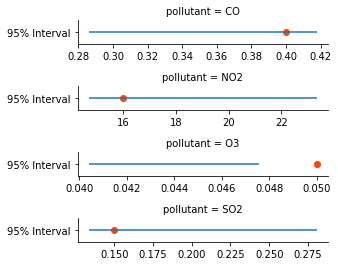

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_ests = pd.read_csv('average_ests.csv').drop(columns='Unnamed: 0')

# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row='pollutant', sharex=False, height=1, aspect=5)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()

### ***Annotating confidence intervals***

Your data science work with pollution data is legendary, and you are now weighing job offers in both Cincinnati, Ohio and Indianapolis, Indiana. You want to see if the SO2 levels are significantly different in the two cities, and more specifically, which city has lower levels. To test this, you decide to look at the differences in the cities' SO2 values (Indianapolis' - Cincinnati's) over multiple years (provided as `diffs_by_year`).

Instead of just displaying a p-value for a significant difference between the cities, you decide to look at the 95% confidence intervals (columns lower and upper) of the differences. This allows you to see the magnitude of the differences along with any trends over the years.

* Provide starting and ending limits (columns `lower` and `upper`) for your confidence intervals to `plt.hlines()`.
* Set interval thickness to `5`.
* Draw a vertical line representing a difference of `0` with `plt.axvline()`.
* Color the null line `'orangered'` to make it stand out.

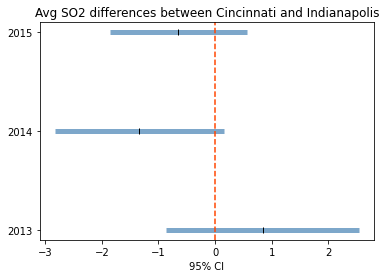

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d = {'year':  [2013, 2014, 2015], 'mean':[0.8408196721311475, -1.3376245847176076, -0.64932735426009], 'std_err':[0.8701349677383201, 0.7615411467017833, 0.6181746079766589], 'lower':[-0.8646448646359598, -2.8302452322531026, -1.8609495858943417], 'upper':[2.5462842088982547, 0.1549960628178877, 0.5622948773741615]}
diffs_by_year = pd.DataFrame(data=d)
diffs_by_year['year'] = diffs_by_year['year'].astype('str')

# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y='year', xmin='lower', xmax='upper', linewidth=5, color='steelblue', 
           alpha = 0.7, data = diffs_by_year)

# Point estimates
plt.plot('mean', 'year', 'k|', data=diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x=0, color='orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

By looking at the confidence intervals you can see that the difference flipped from generally positive (more pollution in Cincinnati) in 2013 to negative (more pollution in Indianapolis) in 2014 and 2015. Given that every year's confidence interval contains the null value of zero, no P-Value would be significant, and a plot that only showed significance would have been entirely hidden this trend.

### ***Making a confidence band***

Vandenberg Air Force Base is often used as a location to launch rockets into space. You have a theory that a recent increase in the pace of rocket launches could be harming the air quality in the surrounding region. To explore this, you plotted a 25-day rolling average line of the measurements of atmospheric NO2. To help decide if any pattern observed is random-noise or not, you decide to add a 99% confidence band around your rolling mean. Adding a confidence band to a trend line can help shed light on the stability of the trend seen. This can either increase or decrease the confidence in the discovered trend.

* Construct upper and lower 99% interval bands by adding and subtracting `2.58` standard errors from the mean.
* Make the point-estimate line white.
* Make the point-estimate line semi-transparent by setting `alpha` to `0.4`.
* Tell `plt.fill_between()` what values to fill between for each day.

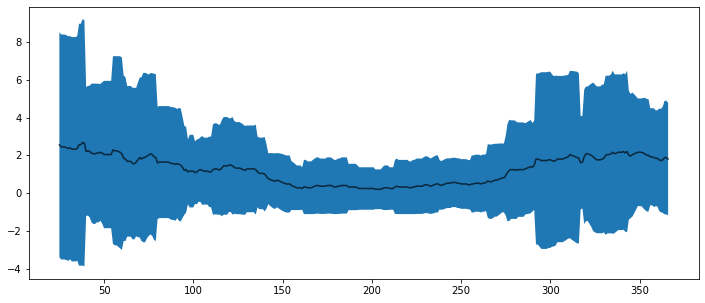

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))

pollution = pd.read_csv('pollution_wide.csv')
vandenberg_NO2 = pollution.loc[pollution['city']=='Vandenberg Air Force Base', ('day', 'NO2')]
vandenberg_NO2['mean'] = vandenberg_NO2['NO2'].rolling(window=25).mean()
vandenberg_NO2['std_err'] = vandenberg_NO2['NO2'].rolling(window=25).std()
vandenberg_NO2 = vandenberg_NO2.iloc[24:364].drop(columns='NO2').reset_index(drop=True)

### I have no idea why the standard deviations are not equal. ###

# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data=vandenberg_NO2, color='black', alpha=0.4)

plt.plot(vandenberg_NO2['day'], vandenberg_NO2['mean'], color='black', alpha=0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x='day', y1='lower', y2='upper', data=vandenberg_NO2)
plt.show()

This plot shows that the middle of the year's NO2 values are not only lower than the beginning and end of the year but also are less noisy. If just the moving average line were plotted, then this potentially interesting observation would be completely missed. (Can you think of what may cause reduced variance at the lower values of the pollutant?)

### ***Separating a lot of bands***

It is relatively simple to plot a bunch of trend lines on top of each other for rapid and precise comparisons. Unfortunately, if you need to add uncertainty bands around those lines, the plot becomes very difficult to read. Figuring out whether a line corresponds to the top of one class' band or the bottom of another's can be hard due to band overlap. Luckily in Seaborn, it's not difficult to break up the overlapping bands into separate faceted plots.

To see this, explore trends in SO2 levels for a few cities in the eastern half of the US. If you plot the trends and their confidence bands on a single plot - it's a mess. To fix, use Seaborn's `FacetGrid()` function to spread out the confidence intervals to multiple panes to ease your inspection.

* Set up a facet grid to separate the plots by the city column in `eastern_SO2`.
* Send the confidence interval plotting function to `map()`.
* Color the confidence intervals `'coral'`.
* Help the overlaid mean line drawn with `g.map(plt.plot,...)` stand out against the confidence bands by coloring it white.

<Figure size 864x360 with 0 Axes>

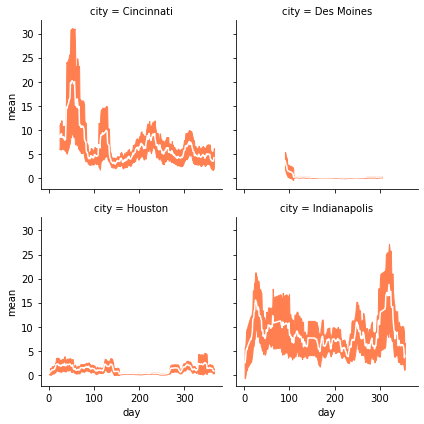

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eastern_SO2 = pd.read_csv('eastern_SO2.csv').drop(columns='Unnamed: 0')

# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col='city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color='coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color='white')

plt.show()

By separating each band into its own plot you can investigate each city with ease. Here, you see that Des Moines and Houston on average have lower SO2 values for the entire year than the two cities in the Midwest. Cincinnati has a high and variable peak near the beginning of the year but is generally more stable and lower than Indianapolis.

### ***Cleaning up bands for overlaps***

You are working for the city of Denver, Colorado and want to run an ad campaign about how much cleaner Denver's air is than Long Beach, California's air. To investigate this claim, you will compare the SO2 levels of both cities for the year 2014. Since you are solely interested in how the cities compare, you want to keep the bands on the same plot. To make the bands easier to compare, decrease the opacity of the confidence bands and set a clear legend.

* Filter the `SO2_compare` to the `for` loop's currently selected `city`.
* Color both the intervals and mean lines with the `color` accompanying each `city`.
* Lower the interval and mean line opacities to 0.4 and 0.25, respectively.
* Override the default legend labels in `plt.plot()` by setting the `label` argument to the city name.

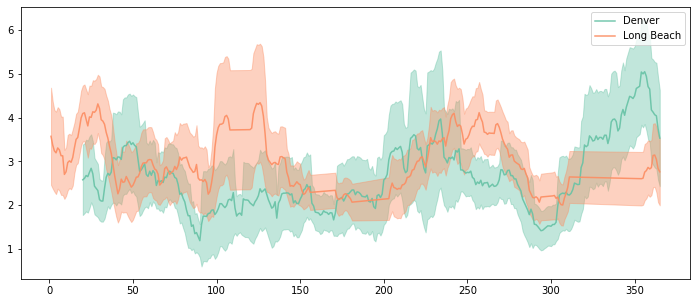

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
SO2_compare = pd.read_csv('SO2_compare.csv').drop(columns='Unnamed: 0')

for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare['city'] == city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x='day', y1='lower', y2='upper', data=city_data,
                     color=color, alpha=0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data=city_data, label=city,
             color=color, alpha=0.9)

plt.legend()
plt.show()

From these two curves you can see that during the first half of the year Long Beach generally has a higher average SO2 value than Denver, in the middle of the year they are very close, and at the end of the year Denver seems to have higher averages. However, by showing the confidence intervals, you can see however that almost none of the year shows a statistically meaningful difference in average values between the two cities.

# ***Multiple Confidence Intervals***

```
# Interval size setup
sizes = ['99%', '95%', '90%']
Z_scores = [2.58, 1.96, 1.67]
colors = ['#fee0b6','#f1a340', '#b35806']

for size, z, color in zip(sizes, Z_scores, colors):
    plt.hlines(y=data['y'], xmin=data['est'] - z*data['std_err'], xmax=data['est'] + z*data['std_err'], color=color, linewidth=7, label=size)

plt.plot('est', 'y', 'ko', data=data, label='Point Estimate')
plt.legend()
```

### ***90, 95, and 99% intervals***

You are a data scientist for an outdoor adventure company in Fairbanks, Alaska. Recently, customers have been having issues with SO2 pollution, leading to costly cancellations. The company has sensors for CO, NO2, and O3 but not SO2 levels.

You've built a model that predicts SO2 values based on the values of pollutants with sensors (loaded as `pollution_model`, a `statsmodels` object). You want to investigate which pollutant's value has the largest effect on your model's SO2 prediction. This will help you know which pollutant's values to pay most attention to when planning outdoor tours. To maximize the amount of information in your report, show multiple levels of uncertainty for the model estimates.

* Fill in the appropriate interval width percents (from 90,95, and 99%) according to the values list in `alpha`.
* In the `for` loop, color the interval by its assigned `color`.
* Pass the loop's width percentage value to `plt.hlines()` to label the legend.

In [ ]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y=conf_ints.index, xmin=conf_ints[0], xmax=conf_ints[1], colors=color, label=width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label='Point Estimate')

plt.legend()
plt.show() 

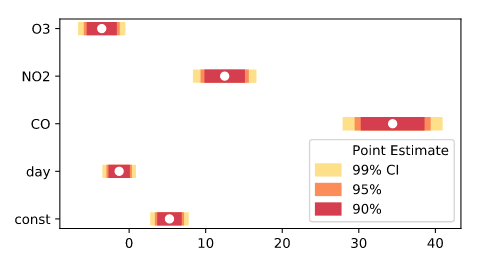

You see that CO's effect-size on SO2 is larger than all other pollutants at not just a 90% confidence level, but a 99% confidence level. By displaying multiple interval widths for your estimates, you can provide a much more complete picture of the uncertainty in your model.

### ***90 and 95% bands***

You are looking at a 40-day rolling average of the NO2 pollution levels for the city of Cincinnati in 2013. To provide as detailed a picture of the uncertainty in the trend you want to look at both the 90 and 99% intervals around this rolling estimate.

To do this, set up your two interval sizes and an orange ordinal color palette. Additionally, to enable precise readings of the bands, make them semi-transparent, so the Seaborn background grids show through.

* Set the opacity of the intervals to 40%.
* Calculate the lower and upper confidence bounds.

In [ ]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x=cinci_13_no2.day, alpha=0.4, color=color,
        y1=cinci_13_no2['mean'] - Z * cinci_13_no2['std_err'],
        y2=cinci_13_no2['mean'] + Z * cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

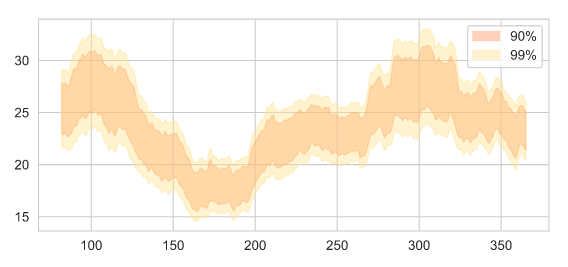

This plot shows us that throughout 2013, the average NO2 values in Cincinnati followed a cyclical pattern with the seasons. However, the uncertainty bands show that for most of the year you can't be sure this pattern is not noise at both a 90 and 99% confidence level.

### ***Using band thickness instead of coloring***

You are a researcher investigating the elevation a rocket reaches before visual is lost and pollutant levels at Vandenberg Air Force Base. You've built a model to predict this relationship (stored in the DataFrame `rocket_height_model`), and since you are working independently, you don't have the money to pay for color figures in your journal article. You need to make your model results plot work in black and white. To do this, you will plot the 90, 95, and 99% intervals of the effect of each pollutant as successively smaller bars.

* Use a thickness of `15` for 90%, `10` for 95%, and `5` for 99% interval lines.
* Pass the interval thickness value to `plt.hlines()`.
* Set the interval color to `'gray'` to lighten contrast.

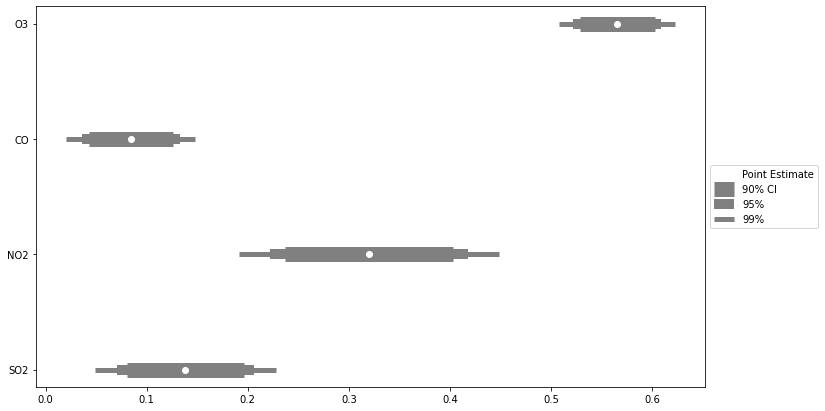

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
rocket_model = pd.read_csv('rocket_model.csv').drop(columns='Unnamed: 0')

# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y=rocket_model.pollutant, 
               xmin=rocket_model['est'] - Z*rocket_model['std_err'],
               xmax=rocket_model['est'] + Z*rocket_model['std_err'],
               label=percent, linewidth=size, 
               color='gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data=rocket_model, label='Point Estimate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

While less elegant than using color to differentiate interval sizes, this plot still clearly allows the reader to access the effect each pollutant has on rocket visibility. You can see that of all the pollutants, O3 has the largest effect and also the tightest confidence bounds.

### ***The bootstrap histogram***

You are considering a vacation to Cincinnati in May, but you have a severe sensitivity to NO2. You pull a few years of pollution data from Cincinnati in May and look at a bootstrap estimate of the average NO2 levels. You only have one estimate to look at the best way to visualize the results of your bootstrap estimates is with a histogram.

While you like the intuition of the bootstrap histogram by itself, your partner who will be going on the vacation with you, likes seeing percent intervals. To accommodate them, you decide to highlight the 95% interval by shading the region.

* Provide the `percentile()` function with the upper and lower percentiles needed to get a 95% interval.
* Shade the background of the plot in the 95% interval.
* Draw histogram of bootstrap means with 100 bins.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


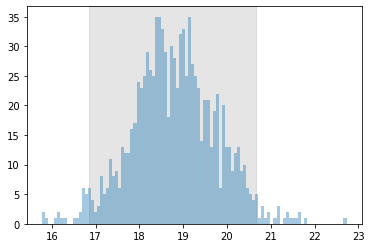

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pollution = pd.read_csv('pollution_wide.csv')
bootstrap = lambda data, n_boots: np.array([np.mean(np.random.choice(data,len(data))) for _ in range(n_boots)])

cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color='gray', alpha=0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins=100, kde=False)
plt.show()

Your bootstrap histogram looks stable and uniform. You're now confident that the average NO2 levels in Cincinnati during your vacation should be in the range of 16 to 23.

### ***Bootstrapped regressions***

While working for the Long Beach parks and recreation department investigating the relationship between NO2 and SO2 you noticed a cluster of potential outliers that you suspect might be throwing off the correlations.

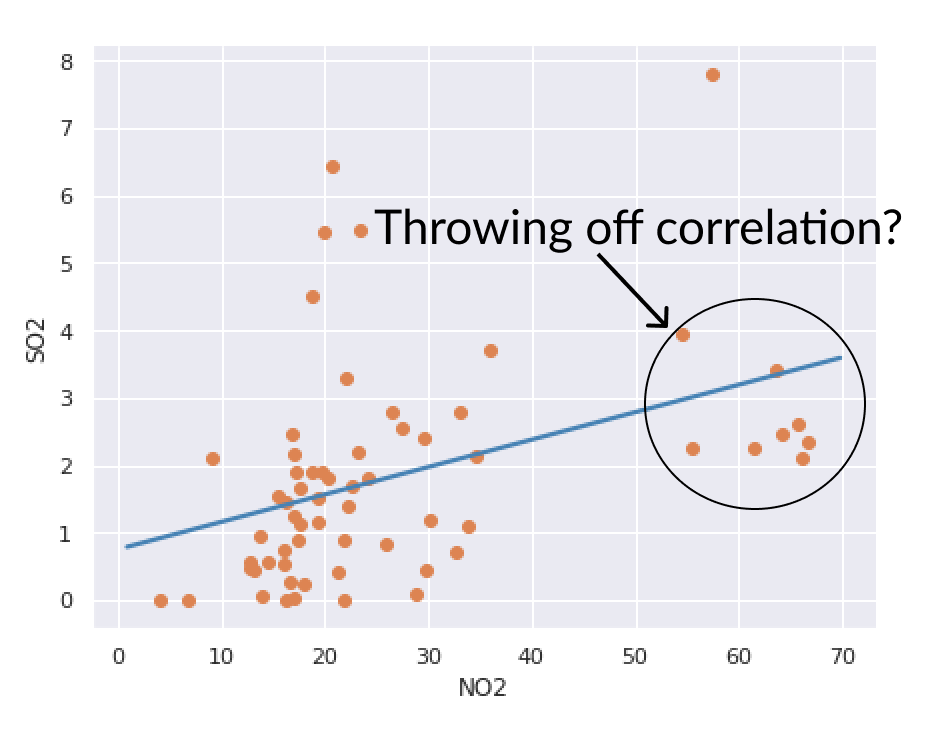

Investigate the uncertainty of your correlations through bootstrap resampling to see how stable your fits are. For convenience, the bootstrap sampling is complete and is provided as `no2_so2_boot` along with `no2_so2` for the non-resampled data.


* Let `sns.lmplot()` know that it needs to draw a separate regression line for each bootstrap sample.
* Color every regression line `'steelblue'` and make them 20% opaque.
* Disable the default Seaborn confidence bands around the regression lines.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


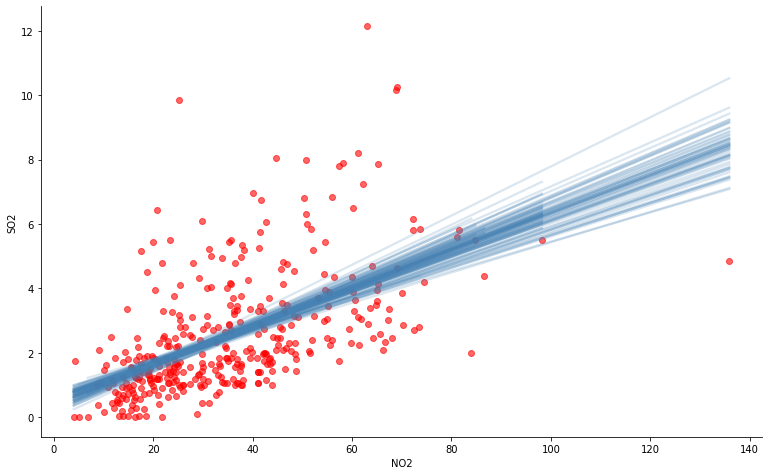

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

no2_so2 = pollution.iloc[6672:7048][['NO2', 'SO2']]
no2_so2_boot = pd.concat([no2_so2.sample(n=len(no2_so2), replace=True).assign(sample=i) for i in range(100)])

sns.lmplot('NO2', 'SO2', data=no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue='sample', 
           # Make lines blue and transparent
           line_kws={'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci=None, legend=False, scatter=False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data=no2_so2, color='red', alpha=0.6)
plt.gcf().set_size_inches((12, 7))
plt.show()

The outliers appear to drag down the regression lines as evidenced by the cluster of lines with more severe slopes than average. In a single plot, you have not only gotten a good idea of the variability of your correlation 
estimate but also the potential effects of outliers.

### ***Lots of bootstraps with swarmplot***

As a current resident of Cincinnati, you're curious to see how the average NO2 values compare to Des Moines, Indianapolis, and Houston: a few other cities you've lived in.

To look at this, you decide to use bootstrap estimation to look at the mean NO2 values for each city. Because the comparisons are of primary interest, you will use a `swarmplot` to compare the estimates.

The DataFrame `pollution_may` is provided along with the `bootstrap()` function seen in the slides for performing your bootstrap resampling.

* Run `bootstrap` resampling on each `city_NO2` vector.
* Add city name as a column in the bootstrap DataFrame, `cur_boot`.
Color all swarm plot points `'coral'` to avoid the color-size problem.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


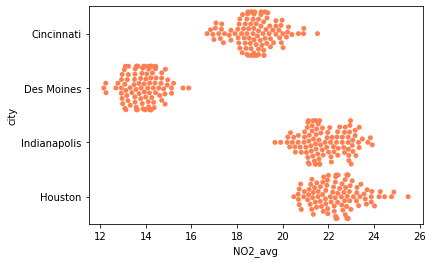

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pollution = pd.read_csv('pollution_wide.csv')
pollution_may = pollution[pollution['month'] == 5]
bootstrap = lambda data, n_boots: np.array([np.mean(np.random.choice(data,len(data))) for _ in range(n_boots)])  

# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city == city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y="city", x="NO2_avg", data=city_boots,  color='coral')
plt.show()

The swarm plots show that Indianapolis and Houston both have the highest average NO2 values, with Cincinnati falling roughly in the middle. Interestingly, you can rather confidently say that Des Moines has the lowest as nearly all its sample estimates fall below those of the other cities.

# ***Scatter Matrix***

Compare correlations between all pairs of ***continuous*** variables in your data.

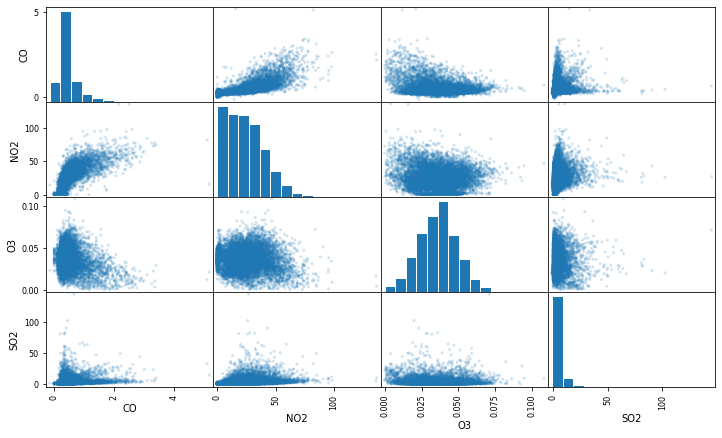

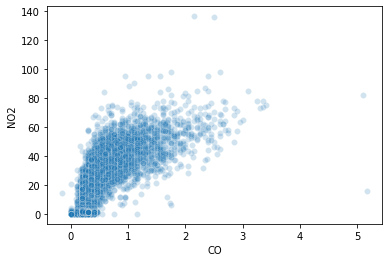

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pollution = pd.read_csv('pollution_wide.csv')
pd.plotting.scatter_matrix(pollution[['CO', 'NO2', 'O3', 'SO2']], alpha = 0.2, hist_kwds={'bins': 15, 'edgecolor':'white'})
plt.gcf().set_size_inches((12, 7)) 
plt.show()

sns.scatterplot(x='CO', y='NO2', data=pollution, alpha=0.2)
plt.show()

### ***Looking at the farmers market data***

Loaded is a new dataset, `markets`. Each row of this DataFrame belongs to an individual farmers market in the continental United States with various information about the market contained in the columns. In this exercise, explore the columns of the data to get familiar with them for future analysis and plotting.

As a first step, print out the first three lines of markets to get an idea of what type of data the columns encode. Then look at the summary descriptions of all of the columns. Since there are so many columns in the DataFrame, you'll want to turn the results 'sideways' by transposing the output to avoid cutting off rows.

* Print the first three rows of the data and transpose by chaining the **`.transpose()`** method to the DataFrame.
* Print the basic description of every column along with its median (which is already specified for you with the `percentiles` argument) and again chain the **`.transpose()`** method.

In [11]:
import pandas as pd

markets = pd.read_csv('markets_cleaned.csv').drop(columns='FMID')

# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
display(first_rows)


# Get descriptions of every column
col_descriptions = markets.describe(include='all',
                                percentiles = [0.5]).transpose()
display(col_descriptions)

,0,1,2
name,Caledonia Farmers Market Association - Danville,Stearns Homestead Farmers' Market,106 S. Main Street Farmers Market
city,Danville,Parma,Six Mile
county,Caledonia,Cuyahoga,NaN
state,Vermont,Ohio,South Carolina
lat,-72.140337,-81.733939,-82.8187
lon,44.411036,41.374801,34.8042
months_open,3.0,4.0,NaN
Bakedgoods,1,1,0
Beans,1,0,0
Cheese,1,0,0


,count,unique,top,freq,mean,std,min,50%,max
name,8739,8158,El Mercado Familiar,33,NaN,NaN,NaN,NaN,NaN
city,8699,4697,Chicago,62,NaN,NaN,NaN,NaN,NaN
county,8228,1503,Los Angeles,121,NaN,NaN,NaN,NaN,NaN
state,8739,53,California,760,NaN,NaN,NaN,NaN,NaN
lat,8710.0,NaN,NaN,NaN,-90.925689,17.366333,-166.54,-86.249268,-64.7043
lon,8710.0,NaN,NaN,NaN,39.133725,5.286239,17.7099,40.017753,64.86275
months_open,5452.0,NaN,NaN,NaN,6.456346,2.743168,1.0,6.0,12.0
Bakedgoods,8739.0,NaN,NaN,NaN,0.592516,0.491394,0.0,1.0,1.0
Beans,8739.0,NaN,NaN,NaN,0.098638,0.298193,0.0,0.0,1.0
Cheese,8739.0,NaN,NaN,NaN,0.330015,0.470245,0.0,0.0,1.0


It may seem boring, but these preliminary explorations of your data help set up the foundations of a successful data science project. Now that you've investigated the data, you can see that it is very "wide" – with many columns corresponding to the different goods sold. The goods are encoded with `1`s and `0`s that indicate whether the market sells the good or not.

### ***Scatter matrix of numeric columns***

You've investigated the new farmer's market data, and it's rather wide – with lots of columns of information for each market's row. Rather than painstakingly going through every combination of numeric columns and making a scatter plot to look at correlations, you decide to make a ***scatter matrix*** using the pandas built-in function.

Increasing the figure size with the `figsize` argument will help give the dense visualization some breathing room. Since there will be a lot of overlap for the points, decreasing the point opacity will help show the density of these overlaps.

* Subset the columns of the `markets` DataFrame to `numeric_columns` so the scatter matrix only shows numeric non-binary columns.
* Increase figure size to `15` by `10` to avoid crowding.
* Reduce point opacity to 50% to show regions of overlap.

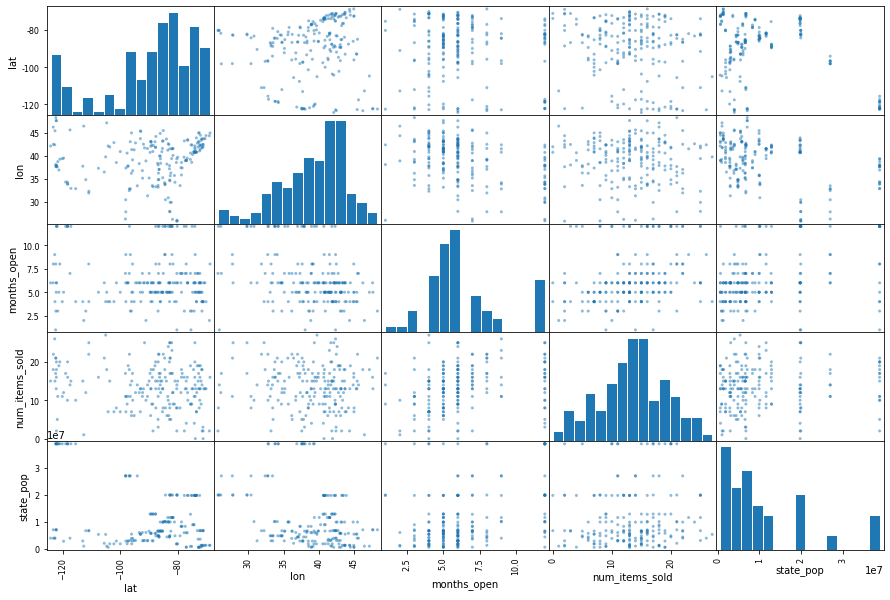

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

markets = pd.read_csv('markets_sub.csv')

# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize=(15, 10), 
                           # Lower point opacity to show overlap
                           alpha=0.5, hist_kwds={'bins': 15, 'edgecolor':'white'})

plt.show()

 Scatter matrices can be a lot of information to take in but are super helpful exploration tools. In this plot, we see that, due to many of the variables taking integers values (e.g., days of the week = 1,2,3,...), there is a lot of 'banding' with points clustering in a line along a given axis. Also, you will likely want to log-transform the population values as the distribution is highly skewed.

### ***Digging in with basic transforms***

You are curious to see if the population of a state correlates to the number of items sold at farmer's markets. To check this, take the log of the population and draw a scatter plot against the number of items sold by a market. From your previous explorations of the dataset, you know there will be a lot of overlap, so to get a better handle on the patterns you want to reduce the marker opacity.

* Use numpy to create a new column: `log_pop` by taking the log of the state population.
* Pass this newly created logged column to the scatter plot function's x-mapping.
* Set the scatter plot's opacity to 50% to show overlap.

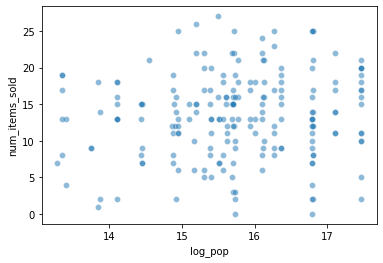

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

markets = pd.read_csv('markets_sub.csv')

# Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x='log_pop', y='num_items_sold', alpha=0.5, data=markets)
plt.show()

This plot shows you that even after transforming the population to remove skewness and lowering the opacity it's hard to see if there's any relationship between the population and number of items sold.

# ***Use OLS to show preliminary correlation***

* May not be valid since the relationship may not be linear.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


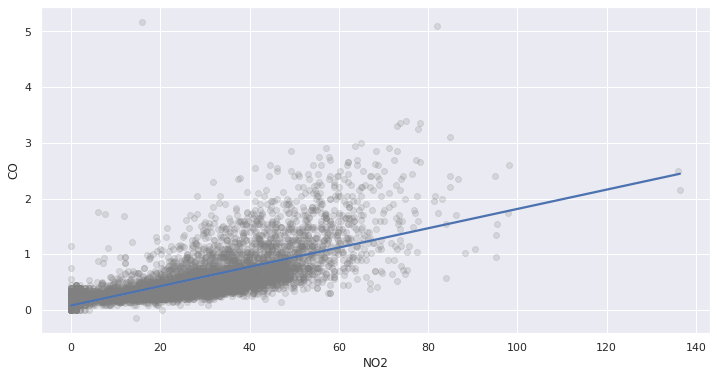

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(12,6))
pollution = pd.read_csv('pollution_wide.csv')
sns.regplot('NO2', 'CO', ci=False, data=pollution, scatter_kws={'alpha':0.2, 'color':'grey'})
plt.show()

### ***Is latitude related to months open?***

While exploring the farmers market dataset with a scatter matrix, you noticed a potentially interesting relationship between a market's latitude and the number of months it stays open. Digging into this relationship a bit further, you decide to use Seaborn's regression plot to see if there's any weight to this pattern or if the heavy overlap of the points is playing tricks on your eyes.

To make the regression line stand out, you'll want to lower the overlapping background points opacity and color them a muted gray. Since you're not going to be making any formal inference and want to quickly investigate a pattern, you can turn off the default uncertainty band.

* Set the scatter plot's points opacity to 10% and color them `'gray'`.
* Disable the default confidence interval band.

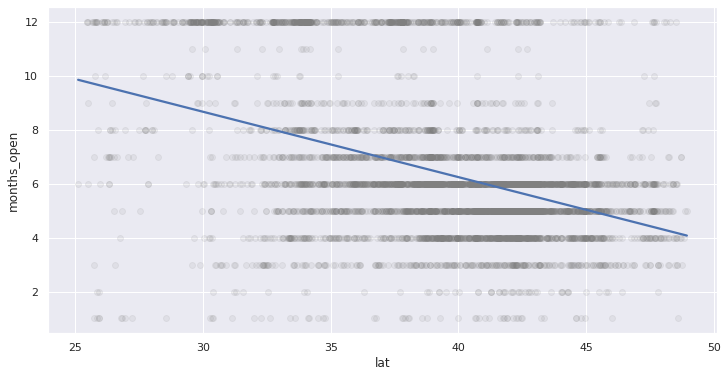

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))

markets = pd.read_csv('markets_sub2.csv')

sns.regplot(x='lat', y='months_open', scatter_kws={'alpha':0.1, 'color':'gray'}, 
            ci=False, data=markets, ax=ax)

plt.show()

Underneath all the overlapping points there may be a negative relationship between a market's latitude and the number of months it's open. While you would never take these results and call the relationship true, you now have a path to dig into further to see if the signal is true or simply noise.

# ***Find interesting patterns in the data***
## ***Using text scatters to indicate outliers***

### ***What state is the most market-friendly?***

While exploring the farmer's market data, you wonder what patterns may show up if you aggregate to the state level. Are some states more market-friendly than other states? To investigate this, you group your data by state and get the log-transformed number of markets (`log_markets`) and state populations (`log_pop`).

```
markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: log(len(d)),
       'state_pop': lambda d: log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))
```

To visualize, you decide to use a regression plot to get an idea of the '***normal***' relationship between market and population numbers and a text-scatter to quickly identify interesting outliers.

* Iterate over the rows of the `markets_and_pop` DataFrame.
* Place annotations next to their scatter plot points.
* Reduce annotation text size to `10` points.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


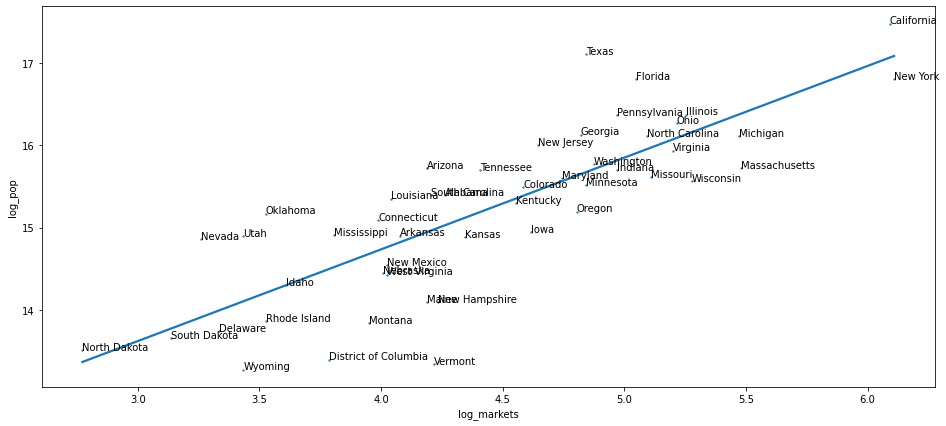

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log

fig, ax = plt.subplots(figsize=(16,7))

markets = pd.read_csv('markets_gb.csv').drop(columns='Unnamed: 0')
markets_and_pop = (markets.groupby('state', as_index=False).agg({'name': lambda d: log(len(d)),'state_pop': lambda d: log(d.iloc[0])}).rename(columns = {'name': 'log_markets', 'state_pop': 'log_pop' }))


g = sns.regplot("log_markets", "log_pop", ci=False,
    # Shrink scatter plot points
    scatter_kws={'s':2}, data=markets_and_pop, ax=ax)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets, log_pop), size=10)

plt.show()

The plot you've just made demonstrates how regression plots are not only great for revealing correlations in your data; they also can help you figure out what's out of the ordinary.

Here you see that Vermont and Texas seem to be the largest outliers. With Vermont falling the furthest below the best-fit line and Texas the furthest above. Giving you an idea about what to investigate next.

### ***Popularity of goods sold by state***

The farmer's market dataset contains columns corresponding to 28 different goods and whether or not they are sold at that market. You're curious to see if there are any interesting stories in this dataset regarding how likely you are to find a given good at a state's markets. To answer this question, you collapse the data into three columns:

* `state` - the name of the state
* `good` - the good of interest
* `prop_selling` - the proportion of markets in that state that sell *that* good

To quickly determine if patterns emerge, you choose a subset of goods you find interesting and decide to make a simple text-scatter: the good on the x-axis and the proportion of a state's markets that sell that good on the y-axis.


* Filter `goods_by_state` to the desired goods listed in `to_plot`.

* Hide the scatter plot points by setting their size to nothing.

  * Note that in `sns.scatterplot()`, size is used to map values from a column to a size scale, and `s` is used to set a constant size for all points.

* Make the text center aligned, so it sits directly on the good's x-axis location.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


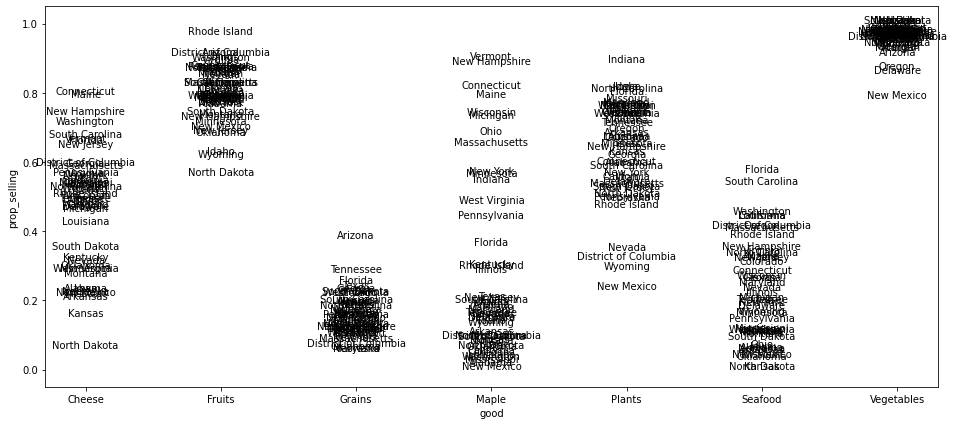

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log

fig, ax = plt.subplots(figsize=(16,7))

goods_by_state = pd.read_csv('goods_by_state.csv').drop(columns='Unnamed: 0')

# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']

goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s=0, ax=ax)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha='center', 
             size =10)

plt.show()

You can see specific states rise above the rest, such as Arizona with grains, and other states like New Mexico consistently lag behind others in the availability of goods. This plot provides you with a lot of potential future avenues of exploration. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


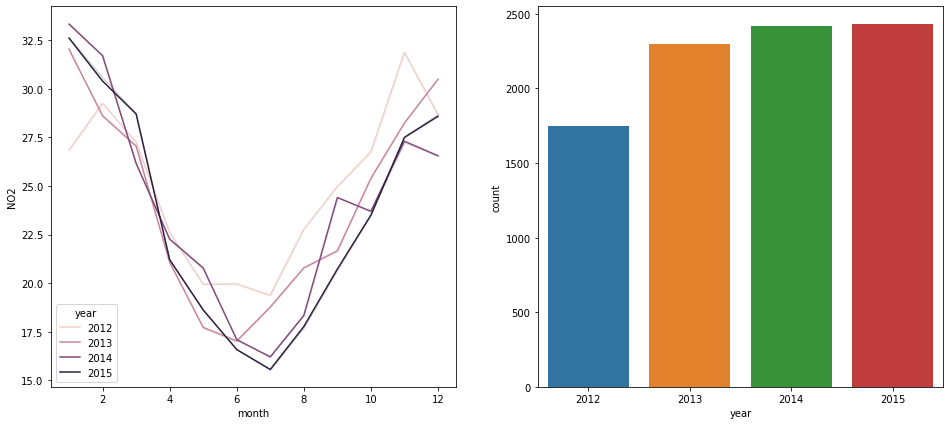

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

pollution = pd.read_csv('pollution_wide.csv')
pol_by_month = pollution[['month','year', 'NO2']]
obs_by_year = pollution.groupby('year')['year'].count().to_frame()
obs_by_year.rename(columns={'year':'count'}, inplace=True)
obs_by_year.reset_index(inplace=True)

sns.lineplot('month', 'NO2', 'year', ax=ax1, data=pol_by_month, ci=False)
sns.barplot('year', 'count', ax=ax2, data=obs_by_year)
plt.show()

จะพบว่า สี ไม่สอดคล้องกัน แก้ด้วย..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


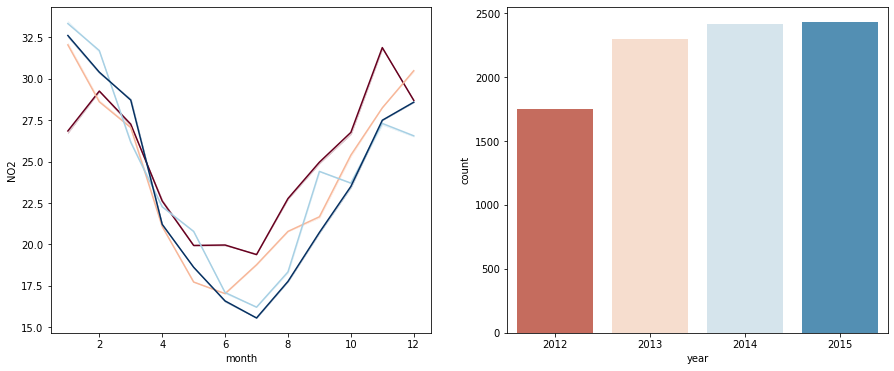

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

sns.lineplot('month', 'NO2', 'year', ax=ax1, data=pol_by_month, palette='RdBu', ci=False)
sns.barplot('year', 'count', 'year', ax=ax2, data=obs_by_year, palette='RdBu', dodge=False)
# Remove legends for both plots
ax1.legend_.remove()
ax2.legend_.remove()
plt.show()

### ***Stacking to find trends***

In the farmers market dataset, you are interested in the number of months that a market stays open in relation to its geography, more specifically its longitude. You're curious to see if there are any regions of the country that behave noticeably different from the others.

To do this, you create a basic map with a scatter plot of the latitude and longitude of each market, coloring each market by the number of months it's open. Further digging into the latitude relationship, you draw a regression plot of the latitude to the number of months open with a flexible fit line to determine if any trends appear. You want to view these simultaneously to get the clearest picture of the trends.

* Set up `plt.subplots()` to have two vertically stacked plots.
* Assign the first (top) plot to the `lon`, `lat` scatter plot.
* Assign the second (bottom) plot to the `lon` to `months_open` regression plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


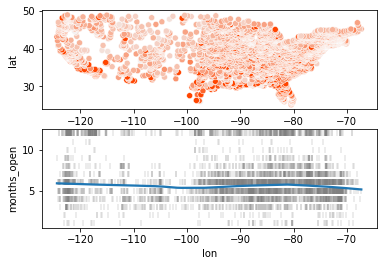

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

markets = pd.read_csv('markets_gb.csv').drop(columns='Unnamed: 0')
markets.rename(columns={'lon':'lat', 'lat':'lon'}, inplace=True)

# Setup two stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", 'months_open', 
                palette=sns.light_palette("orangered",n_colors = 12), 
                legend=False, data=markets,
                ax=ax1)

# Plot a regression plot on second plot
sns.regplot('lon', 'months_open',
            scatter_kws={'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess=True,
            marker='|', data=markets, 
            ax=ax2)

plt.show()

 You have broad geographic trends on how long markets stay open in the top map plot. While below, the scatter focuses on patterns in longitude; showing detailed cross-country trends.

Notice the slight bump around longitude -90? What region of the country seems to be causing this?

### ***Using a plot as a legend***

One interesting thread of investigation in the farmer's market data is a state's "market friendliness" and specifically, the outliers. One way to look at this is by using the ratio of farmer's markets to people by state. You could directly look at the ratio; however, a ratio throws away the raw information about a state's population and the number of markets. A large state with a high ratio could be more interesting than a small one.

You can show both the ratio and raw numbers by drawing two plots, one of the ratio and the other of the market number to population scatter plot. To help simplify your now dense visualization, you can use the bar plot as a legend; calling out interesting states by matching the colors of their bars and scatter points.

* Set up two plots side-by-side using `plt.subplots()`.
* Map the column `is_selected` to the color of both the bar and scatter plot.
* Disable `dodge` on the bar plot, so the bars are full height.
* Remove the legends in both plots.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


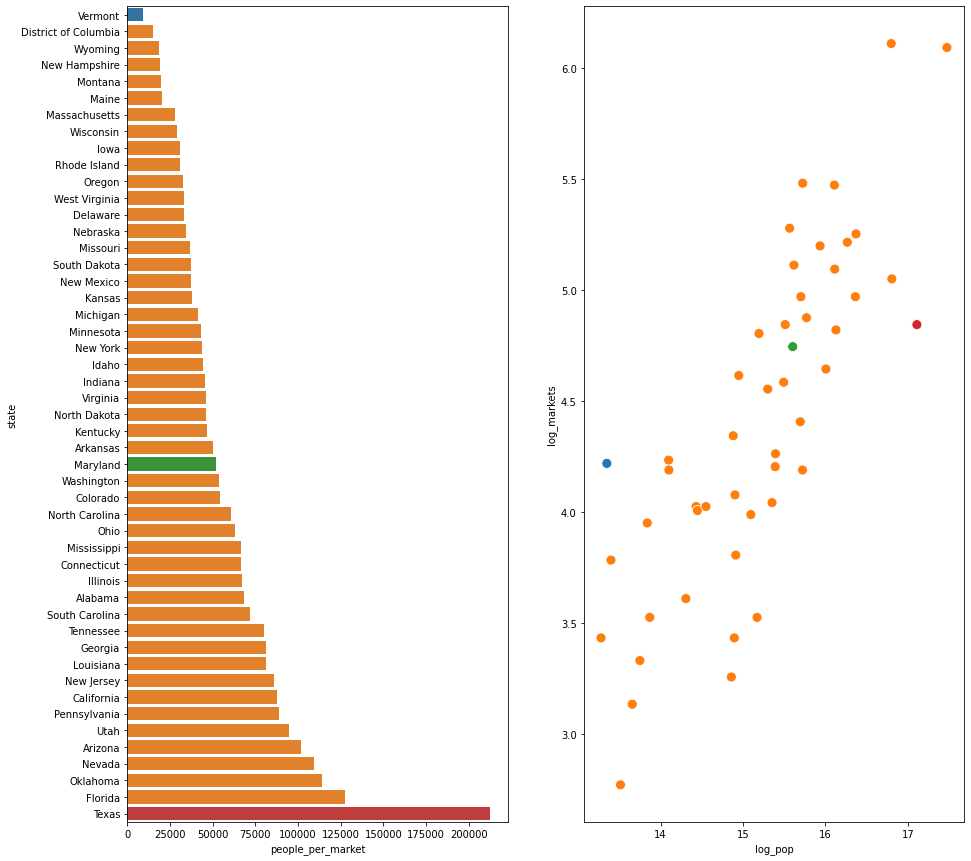

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log

markets = pd.read_csv('markets_gb.csv').drop(columns='Unnamed: 0')
markets_by_state = (markets.groupby('state', as_index=False).agg({'name': lambda d: len(d),'state_pop': lambda d: d.iloc[0]}).rename(columns = {'name': 'num_markets', 'state_pop': 'population' }))
markets_by_state['people_per_market'] = markets_by_state['population'].div(markets_by_state['num_markets'])
markets_by_state['log_pop'] = log(markets_by_state['population'])
markets_by_state['log_markets'] = log(markets_by_state['num_markets'])
markets_by_state['is_selected'] = 'other'
markets_by_state.loc[markets_by_state['state']=='Vermont', 'is_selected'] = 'Vermont'
markets_by_state.loc[markets_by_state['state']=='Maryland', 'is_selected'] = 'Maryland'
markets_by_state.loc[markets_by_state['state']=='Texas', 'is_selected'] = 'Texas'
markets_by_state.sort_values(by='people_per_market', inplace=True)

############################################################################

# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue='is_selected',
            # Disable dodge so bars are full size
            dodge=False, data=markets_by_state, ax=ax1)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue='is_selected', 
                data=markets_by_state, ax=ax2, s=100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove()
plt.show() 


 By making double use of the bar chart as a legend, you have made a very efficient and information-dense data visualization. Always be on the lookout for how you can embed your legend into the plot to make the visualization intuitive and clean.

### ***Cleaning up the background***

While exploring state-level patterns in goods sold at farmer's markets, a few states stood out to you. North Dakota and New Mexico routinely fell near the bottom of the states regarding their proportion of farmer's markets selling a given good. Whereas Vermont was always near the top. You want to present the general patterns in good sales by state, while also highlighting the states you found interesting.

You make a scatter plot of goods being sold by the proportion of markets that sell that good in a state. To highlight the interesting states, you draw a line between each of the state's points. To make a clean and minimal plot, you reduce the background to a simple set of orienting grids.

* Set the background of the plot to be white with gridlines.
* Encode the x and y-axes of the scatter and line plots with the `'good'` being sold and `'prop selling'`, respectively.
* Remove all of the borders from the plot. Remember, by default, `sns.despine()` *only removes the top and right border lines (spines)!*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


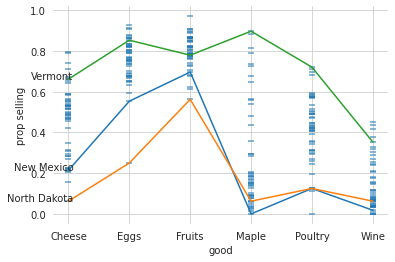

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

goods_by_state = pd.read_csv('goods_by_state_2.csv').drop(columns='Unnamed: 0')

# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good','prop selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop selling', 'state', data=highlighted, legend=False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom=True, left=True)
plt.show()

### ***Remixing a plot***

You find the relationship between the latitude of a farmer's market and the number of months the market was open fascinating. Intuitively as one gets further South, the growing seasons are longer, and thus the markets can stay open longer. To visualize this story, you summarize the market data at the state level and draw a heatmap with columns corresponding to the duration the markets are open. Each row in the heatmap shows the distribution of the market "season" for a state and rows are sorted in descending order of the state's latitude.

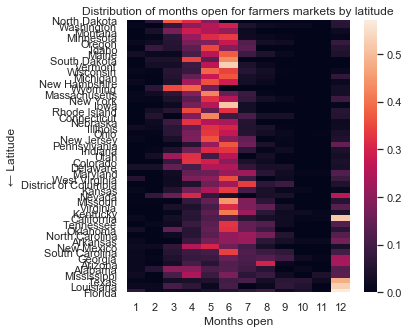

The default heatmap leaves a lot to be desired. Decrease the font size to allow each state name to fit without overlap. The dark color palette also clashes with the light background, and the colorbar doesn't help the reader as the point is relative comparisons.


* Decrease the font size to 85% of the default to un-crowd state names.
* Make new color palette that goes from `'white'` to `'steelblue'`.
* Replace the default palette with the newly created one.
* Remove the continuous color bar legend drawn next to heatmap.

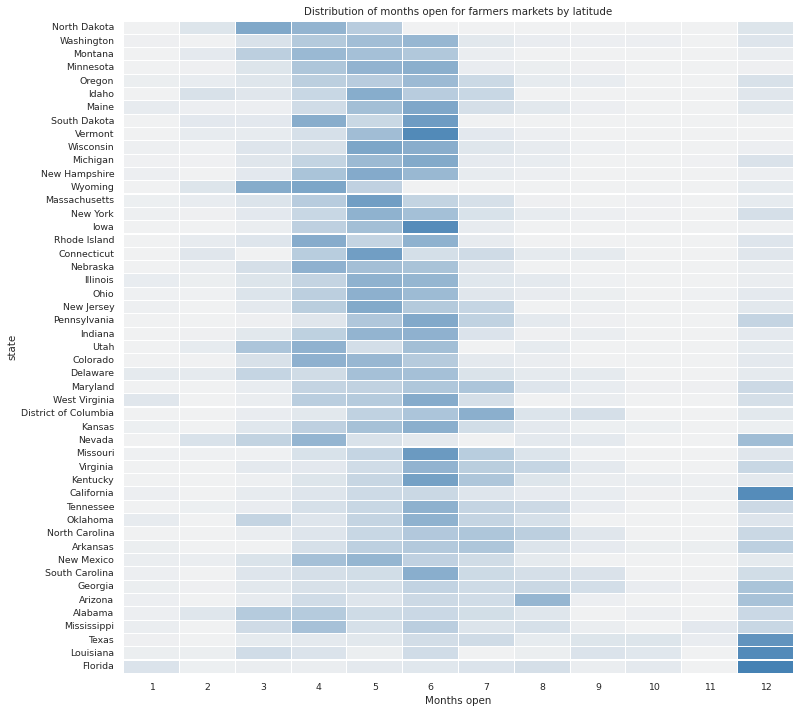

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

markets_by_month = pd.read_csv('markets_by_month.csv', index_col='state').drop(columns='Unnamed: 0')
markets_by_month.columns.name = 'Months open'
state_by_lat = ['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon', 'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan', 'New Hampshire', 'Wyoming', 'Massachusetts', 'New York',
       'Iowa', 'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio', 'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado', 'Delaware', 'Maryland', 'West Virginia',
       'District of Columbia', 'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California', 'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico', 'South Carolina', 'Georgia',
       'Arizona', 'Alabama', 'Mississippi', 'Texas', 'Louisiana', 'Florida']



# Decrease font size so state names are less crowded
sns.set(font_scale=0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap=True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap=blue_pal, cbar=False,
            yticklabels=True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.gcf().set_size_inches((12, 12))
plt.title('Distribution of months open for farmers markets by latitude')
plt.show()


By making a few minor tweaks to the style of this plot you've made it much more presentable and attractive than it started! The trend of markets staying open for more of the year in southern states is reflected clearly, and the detailed axes allow readers to dig in and find their own stories in the data.

### ***Enhancing legibility***

You and your colleagues have decided that the most important aspect of the data you want to show is the differences between the most "market-friendly" state, Vermont, and the least, Texas. To do this, put two plots side by side – a barplot showing the number of people per farmer's market in the state and a scatter plot showing the population on the x-axis and the number of markets on the y-axis.

Emphasize your findings by calling out Vermont and Texas by assigning them distinct colors. Also, provide a large and easy to read annotation for Texas.

Supplied is a vector `state_colors` that assigns Vermont and Texas unique colors and all other states gray along with the annotation describing Texas, `tx_message`.

* Map the supplied color vector `state_colors` to the bar plot (`ax1`) with the palette argument in `sns.barplot()`.
* Map the color vector to the scatter plot points with the `color` argument.
* Make sure annotation text is legible by changing its size to `15`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


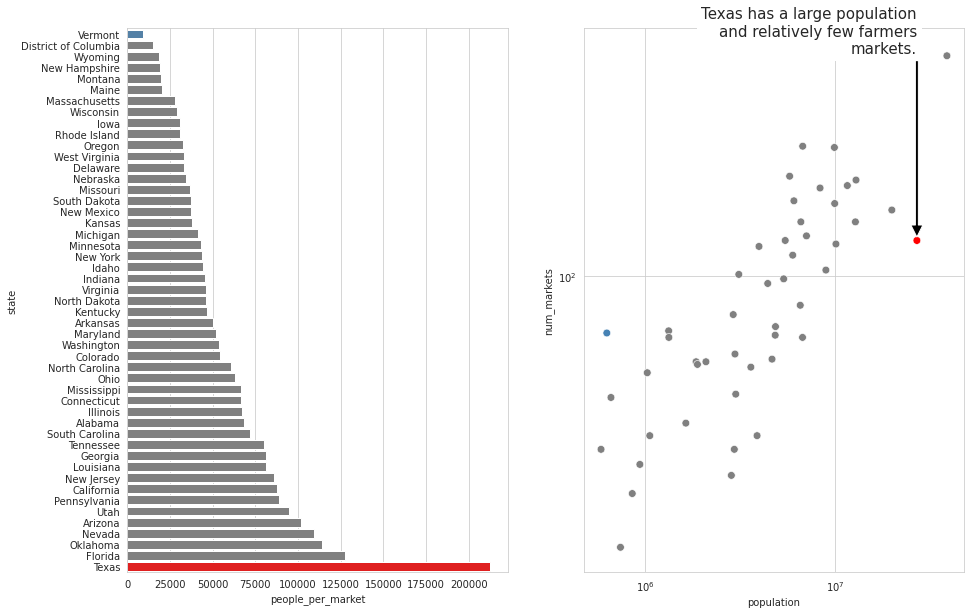

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log

markets = pd.read_csv('markets_gb.csv').drop(columns='Unnamed: 0')
markets_by_state = (markets.groupby('state', as_index=False).agg({'name': lambda d: len(d),'state_pop': lambda d: d.iloc[0]}).rename(columns = {'name': 'num_markets', 'state_pop': 'population' }))
markets_by_state['people_per_market'] = markets_by_state['population'].div(markets_by_state['num_markets'])
markets_by_state.sort_values(by='people_per_market', inplace=True)
state_colors = ['steelblue',  'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray','gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red']
tx_message = 'Texas has a large population\nand relatively few farmers\nmarkets.'

#########################################
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette=state_colors,
            data=markets_by_state, ax=ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', c=state_colors,
                    data=markets_by_state, s=60, ax=ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale="log", yscale='log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958, 130), 
             xytext = (26956958, 450),ha = 'right', 
             size=15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()

 In this rather advanced plot, the viewer has their eyes guided by the colors to two important states. The annotation helps guide the exploration of the plot; showing Texas and Vermont fall on both ends of the spectrum for both state size and people-per-market.

By providing two different views of the data with the bar and scatter and linking two important values between the plots using subtle color cues, your visualization instantly becomes more approachable.